# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19097831,
            "id": 1,
            "last_updated": 1658253215,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 444633239688,
                    "percent_change_1h": 0.388966886764999,
                    "percent_change_24h": 6.36086099066001,
                    "percent_change_7d": 16.9091753445169,
                    "percentage_change_1h": 0.388966886764999,
                    "percentage_change_24h": 6.36086099066001,
                    "percentage_change_7d": 16.9091753445169,
                    "price": 23380.0,
                    "volume_24h": 59979685091
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19097831,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119743154,
            "id": 1027,
            "last_updated": 1658253256,
            "max_supply": 119743070,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 187566848639,
                    "percent_change_1h": 0.123882648929669,
                    "percent_change_24h": 6.44876176114267,
                    "percent_change_7d": 42.9856983493536,
                    "percentage_change_1h": 0.123882648929669,
                    "percentage_change_24h": 6.44876176114267,
                    "percentage_change_7d": 42.9856983493536,
                    "price": 1569.2,
                    "volume_24h": 29430341990
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119743154,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptoc

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The price for BTC is ${btc_price}")


The price for BTC is $23380.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The price for ETH is ${eth_price}")


The price for ETH is $1569.2


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of your holding in BTC is ${btc_value}")


The current value of your holding in BTC is $28056.0


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins *eth_price

# Print current value of your holding in ETH
print(f"The current value of your holding in ETH is ${eth_value}")


The current value of your holding in ETH is $8316.76


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The total value of your crypto currency wallet is ${total_crypto_wallet}")


The total value of your crypto currency wallet is $36372.76


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY","AGG"]

# Set timeframe to 1Day
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2022-07-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-08", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
closing_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
display(closing_prices_df)
    
# Reorganize the DataFrame
# Separate ticker data
SPY = closing_prices_df[closing_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = closing_prices_df[closing_prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
closing_prices_df = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Review the first 5 rows of the Alpaca DataFrame
closing_prices_df.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-07-08 04:00:00+00:00,101.35,101.4499,101.16,101.23,5269814,19181,101.268556,AGG
2022-07-08 04:00:00+00:00,387.16,390.6400,385.66,388.67,72468892,509776,388.661805,SPY


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2022-07-08 04:00:00+00:00  101.35  101.4499  101.16  101.23  5269814   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-07-08 04:00:00+00:00       19181  101.268556  387.16  390.64  385.66   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-08 04:00:00+00:00  388.67  72468892      509776  388.661805

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = closing_prices_df["AGG"]["close"].item()

# Print the AGG closing price
print(f'The closing price of AGG is ${agg_close_price}')


The closing price of AGG is $101.23


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = closing_prices_df["SPY"]["close"].item()

# Print the SPY closing price
print(f'The closing price of SPY is ${spy_close_price}')


The closing price of SPY is $388.67


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${agg_value}")


The current value of the bond portfolio is $20246.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value}")


The current value of the stock portfolio is $42753.700000000004


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds}")


The current balance of the stock and bond portion of the portfolio is $62999.700000000004


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"The total value of the member's entire savings portfolio is ${total_portfolio}")


The total value of the member's entire savings portfolio is $99372.46


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[36372.76, 62999.700000000004]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(list(savings_data))
savings_df.columns = ['amount']
savings_df.index = ['crypto','stock/bond']

# Display the savings_df DataFrame
display(savings_df)


,amount
crypto,36372.76
stock/bond,62999.70


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

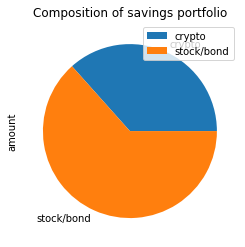

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_plot = savings_df.plot.pie(y='amount', title ='Composition of savings portfolio')
savings_plot.legend(loc="best")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    display(f'Congratulations! You have a fully funded emergency fund')
elif total_portfolio == emergency_fund_value:
    display(f'Congratulations! You have met your goal for your emergency fund, now keep saving')
else:
    display(f'Not there yet! You need to save ${emergency_fund_value-total_portfolio} more to meet your goal')


'Congratulations! You have a fully funded emergency fund'

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
start_date = pd.Timestamp("2019-07-08", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-08", tz="America/New_York").isoformat()



In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
three_yr_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = three_yr_prices_df[three_yr_prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = three_yr_prices_df[three_yr_prices_df['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
three_yr_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
display(three_yr_prices_df.head())
display(three_yr_prices_df.tail())


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-07-08 04:00:00+00:00  297.01  298.2579  296.22  296.82  45961732   
2019-07-09 04:00:00+00:00  295.51  297.5200  295.48  297.19  41504115   
2019-07-10 04:00:00+00:00  298.40  299.6600  297.78  298.61  59008229   
2019-07-11 04:00:00+00:00  299.34  299.5800  298.20  299.31  50935140   
2019-07-12 04:00:00+00:00  299.86  300.7300  299.51  300.65  40511434   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2019-07-08 04:00:00+00:00      190736  296.885773  111.23  111.260  111.0300   
2019-07-09 04:00:00+00:00      166322  296.762207  111.04  111.060  110.9501   
2019-07-10 04:00:00+00:00      258916  298.535745  111.14  111.160  110.9700   
2019-07-11 04:00:00+00:00      223129  299.020452  111.06  111.060  110.6700   
2019-07-12 04:00:00+00:00      176835  300.142196  110.67  110.845  110.6700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-07-08 04:00:00+00:00  111.03  3041397       14684  111.126862  
2019-07-09 04:00:00+00:00  111.00  2525797       12502  111.003473  
2019-07-10 04:00:00+00:00  111.08  4589808       12729  111.056172  
2019-07-11 04:00:00+00:00  110.67  3303803       15075  110.805383  
2019-07-12 04:00:00+00:00  110.79  3837088       22044  110.768279

SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2022-07-01 04:00:00+00:00  376.60  381.70  373.800  381.24  74165514   
2022-07-05 04:00:00+00:00  376.00  381.98  372.900  381.96  79887221   
2022-07-06 04:00:00+00:00  382.07  385.87  379.600  383.25  69844126   
2022-07-07 04:00:00+00:00  385.12  389.83  383.267  388.99  64172156   
2022-07-08 04:00:00+00:00  387.16  390.64  385.660  388.67  72468892   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-07-01 04:00:00+00:00      601221  378.221516  102.21  102.7874  102.0900   
2022-07-05 04:00:00+00:00      645359  377.447552  102.54  102.7043  102.3465   
2022-07-06 04:00:00+00:00      614420  382.508286  102.78  102.8000  101.8400   
2022-07-07 04:00:00+00:00      467708  387.621834  101.94  101.9799  101.5200   
2022-07-08 04:00:00+00:00      509776  388.661805  101.35  101.4499  101.1600   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-01 04:00:00+00:00  102.34  7274799       26198  102.348326  
2022-07-05 04:00:00+00:00  102.53  6813031       27463  102.550763  
2022-07-06 04:00:00+00:00  101.84  6644945       26799  102.118683  
2022-07-07 04:00:00+00:00  101.61  8220620       17966  101.626894  
2022-07-08 04:00:00+00:00  101.23  5269814       19181  101.268556

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirtyyear = MCSimulation(
    portfolio_data = three_yr_prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-07-08 04:00:00+00:00  297.01  298.2579  296.22  296.82  45961732   
2019-07-09 04:00:00+00:00  295.51  297.5200  295.48  297.19  41504115   
2019-07-10 04:00:00+00:00  298.40  299.6600  297.78  298.61  59008229   
2019-07-11 04:00:00+00:00  299.34  299.5800  298.20  299.31  50935140   
2019-07-12 04:00:00+00:00  299.86  300.7300  299.51  300.65  40511434   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-08 04:00:00+00:00      190736  296.885773          NaN  111.23   
2019-07-09 04:00:00+00:00      166322  296.762207     0.001247  111.04   
2019-07-10 04:00:00+00:00      258916  298.535745     0.004778  111.14   
2019-07-11 04:00:00+00:00      223129  299.020452     0.002344  111.06   
2019-07-12 04:00:00+00:00      176835  300.142196     0.004477  110.67   

                                                                           \
                              high       low   close   volume trade_count   
timestamp                                                                   
2019-07-08 04:00:00+00:00  111.260  111.0300  111.03  3041397       14684   
2019-07-09 04:00:00+00:00  111.060  110.9501  111.00  2525797       12502   
2019-07-10 04:00:00+00:00  111.160  110.9700  111.08  4589808       12729   
2019-07-11 04:00:00+00:00  111.060  110.6700  110.67  3303803       15075   
2019-07-12 04:00:00+00:00  110.845  110.6700  110.79  3837088       22044   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-08 04:00:00+00:00  111.126862          NaN  
2019-07-09 04:00:00+00:00  111.003473    -0.000270  
2019-07-10 04:00:00+00:00  111.056172     0.000721  
2019-07-11 04:00:00+00:00  110.805383    -0.003691  
2019-07-12 04:00:00+00:00  110.768279     0.001084

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 110.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 120.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 130.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 140.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 150.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 160.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 170.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 180.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 190.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 200.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 210.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 220.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 230.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 240.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 250.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 260.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 270.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 280.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 290.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 300.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 310.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 320.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 330.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 340.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 350.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 360.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 370.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 380.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 390.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 400.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 410.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 420.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 430.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 440.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 450.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 460.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 470.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 480.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

Running Monte Carlo simulation number 490.


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Co

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993647,1.004515,0.999395,1.004711,1.000345,0.996620,0.990661,0.993154,1.004787,0.994230,...,0.991962,1.007028,1.007737,1.010881,1.006787,0.989829,1.007001,1.000194,0.993304,1.020294
2,0.988914,1.007510,1.006581,0.988481,1.002760,1.012397,0.994112,1.001451,1.013161,0.996509,...,0.975994,1.005915,1.006931,1.008316,0.996981,0.984699,0.993556,1.009744,0.989358,1.022148
3,0.962982,0.990282,1.006448,0.988920,1.005493,0.999754,0.999878,1.008011,1.023468,1.003392,...,0.975411,0.996081,1.005248,1.009291,0.995968,0.993428,0.983422,1.006625,0.984829,1.022500
4,0.970356,0.998336,0.999656,0.979847,1.021091,1.008726,0.990089,1.006922,1.029061,1.003167,...,0.976773,0.999249,1.018220,1.020949,0.993924,0.976421,0.987533,1.011283,0.987513,1.039736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.289458,3.300158,17.861578,1.963174,10.896065,5.812879,5.345750,6.952252,7.244335,6.427358,...,2.144208,1.681984,1.854516,2.509656,11.623662,4.325221,4.206014,3.397184,2.673016,10.161284
7557,2.315638,3.285800,17.920352,1.986750,10.685874,5.737685,5.365417,6.919988,7.212187,6.438559,...,2.133633,1.722725,1.841500,2.480278,11.506258,4.313377,4.256162,3.389587,2.683419,10.119617
7558,2.333010,3.262340,17.956308,1.978533,10.709297,5.792027,5.414657,6.904000,7.215635,6.444359,...,2.114288,1.731893,1.867396,2.533832,11.493285,4.327473,4.200998,3.341612,2.665632,10.181923
7559,2.341907,3.269134,17.929572,1.954978,10.686523,5.811854,5.452231,6.886436,7.202583,6.440398,...,2.101788,1.728920,1.882438,2.511461,11.516905,4.311103,4.196796,3.395842,2.652194,10.126139


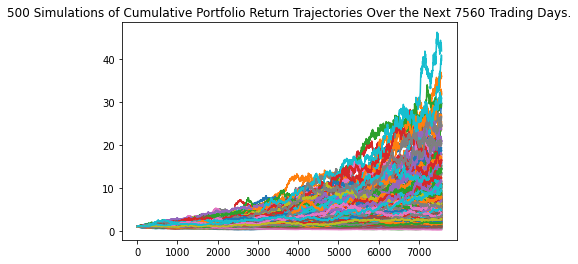

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

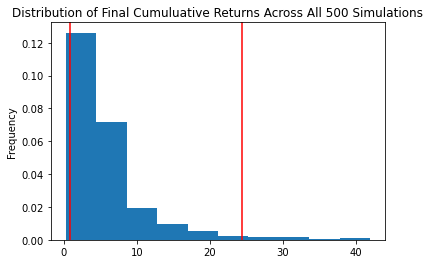

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              5.992134
std               5.758421
min               0.246656
25%               2.474305
50%               4.197745
75%               7.244841
max              41.942199
95% CI Lower      0.875374
95% CI Upper     24.421799
Name: 7560, dtype: float64


C:\Users\darre\OneDrive\Desktop\GitHub_Upload\Challenge 5\Starter_Code\Financial_planning_tools\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * 10000
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * 10000


# Print the result of your calculations
# YOUR CODE HERE


SyntaxError: invalid syntax (2789942235.py, line 2)

### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
    portfolio_data = three_yr_prices_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_tenyear.portfolio_data.head()


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_tenyear.plot_simulation()


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_tenyear.plot_distribution()


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_tenyear.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics)

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?